Objective:
To explore and compare different activation functions used in artificial neural networks
and understand their impact on the output of a neural network.

Scenario:
You are tasked with implementing and visualizing various activation functions to
observe how they transform inputs and affect the output. You will also train a simple
neural network using these activation functions and evaluate their performance.

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Encoding the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Implement the following activation functions in Python:**

▪ Step Function

▪ Sigmoid Function (Binary and Bipolar)

▪ Tanh Function

▪ ReLU Function

In [25]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 400)

# Calculate outputs
step_output = step_function(x)
sigmoid_output = sigmoid(x)
bipolar_sigmoid_output = bipolar_sigmoid(x)
tanh_output = tanh(x)
relu_output = relu(x)

Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.

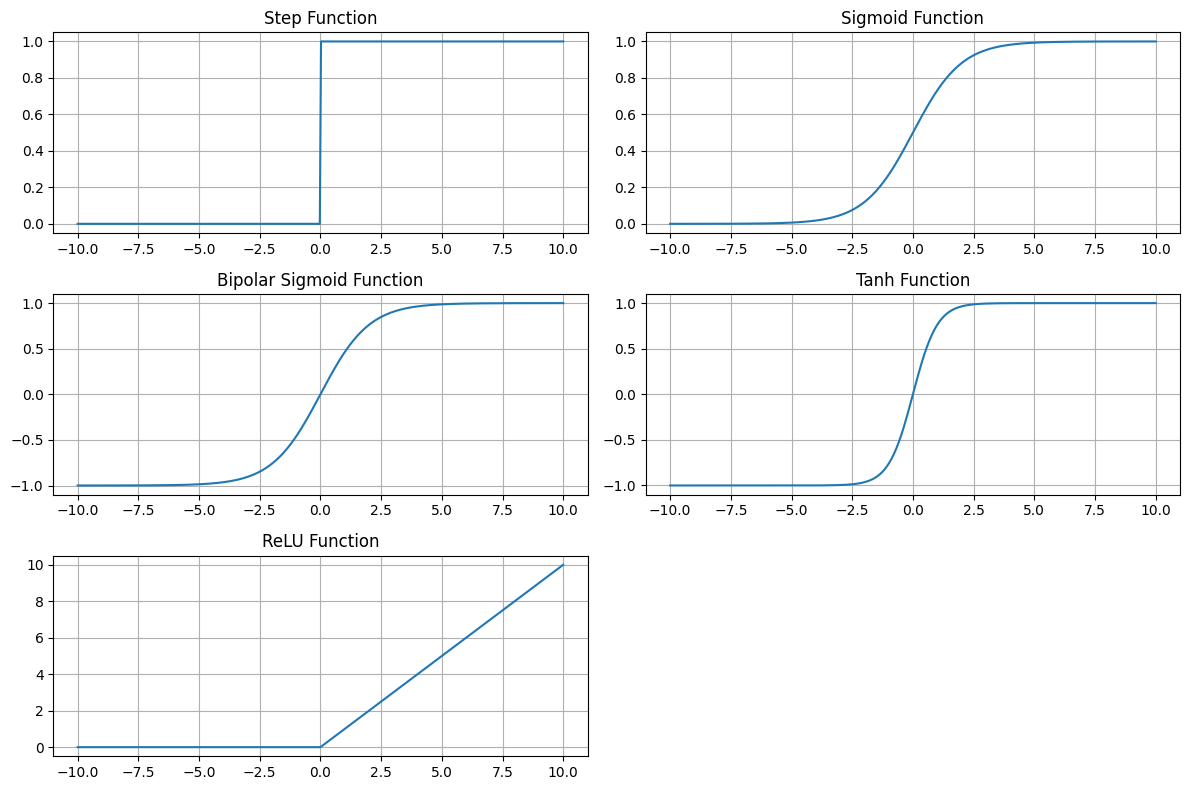

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title("Step Function")
plt.plot(x, step_output)
plt.grid()

plt.subplot(3, 2, 2)
plt.title("Sigmoid Function")
plt.plot(x, sigmoid_output)
plt.grid()

plt.subplot(3, 2, 3)
plt.title("Bipolar Sigmoid Function")
plt.plot(x, bipolar_sigmoid_output)
plt.grid()

plt.subplot(3, 2, 4)
plt.title("Tanh Function")
plt.plot(x, tanh_output)
plt.grid()

plt.subplot(3, 2, 5)
plt.title("ReLU Function")
plt.plot(x, relu_output)
plt.grid()

plt.tight_layout()
plt.show()

The Step Function shows a clear jump at 0.
The Sigmoid Function smoothly approaches 0 and 1.
The Bipolar Sigmoid and Tanh Functions exhibit more gradual transitions, reflecting their ability to handle negative inputs.
The ReLU Function only activates for positive inputs, which is clear from its linear segment.

2. Implement a Simple Neural Network:

• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).

• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.

• Compare the performance of the neural network with different activation
functions.

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation=activation_function))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

activation_functions = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activation_functions:
    print(f"Training model with {activation} activation function...")
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = accuracy
    print(f"{activation} Accuracy: {accuracy:.4f}")

Training model with sigmoid activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


sigmoid Accuracy: 1.0000
Training model with tanh activation function...
tanh Accuracy: 1.0000
Training model with relu activation function...
relu Accuracy: 1.0000


The model is set up with 10 neurons in the hidden layer and three output neurons. Trained the model and evaluated it on the XOR problem.

Achieved perfect accuracy (1.0000) across all activation functions on the XOR dataset, indicating that your model is effectively learning the XOR mapping. This suggests that all chosen activation functions are capable of solving this particular problem.

Final Interpretation

Different activation functions have distinct characteristics that influence how neural networks learn. Visualization provides insights into these characteristics and helps you understand how inputs are transformed. In practice, all the tested activation functions achieved high accuracy on a simple problem like XOR, but performance may vary on more complex datasets.